In [245]:
from kaleido.scopes.plotly import PlotlyScope
import optuna
import plotly
import plotly.express as px
import pandas as pd
import imp  
import customplots as cplot
imp.reload(cplot)
import plotly.graph_objects as go
study = optuna.create_study(study_name='Study_ALL', storage='sqlite:///../feature_extraction/optuna_median.db',load_if_exists=True)
params = [k for k in optuna.importance.get_param_importances(study)]
    
icy=['rgb(0,0,0)','rgb(50,50,140)','rgb(70,70,160)','rgb(110,110,200)','rgb(130,130,210)',
     'rgb(150,150,230)', 'rgb(170,170,255)','rgb(190,190,255)',
     'rgb(200,200,255)','rgb(210,210,255)','rgb(220,220,255)','rgb(240,240,255)']
icy_r=icy.copy()
icy_r.reverse()

In [ ]:
imp.reload(cplot)


fig=cplot.get_parallel_coordinate_plot(study,coloring=icy,logLoss=False)
scope = PlotlyScope()
fig= fig.update_layout(   
    autosize=False,title_text='Loss vs Hyper-Parameter Parallel Plot', title_x=0.5, title_y=0.98, 
    template="ggplot2",
    width=1200,
    height=400,
    font_family="Times New Roman",
    font_size=20,
    title_font_family="Times New Roman",
    title_font_size=30,           
       margin=dict(l=50, t=90,r=1,  b=10),
    )

with open("parallel_coord.svg", "wb") as f:
    f.write(scope.transform(fig, format="svg", width=1100,height=500,))
fig

In [ ]:
imp.reload(cplot)
fig=cplot.get_slice_plot(study,objective_value="Loss")
fig.update_layout(
    autosize=False,title_text='Loss vs Hyper-Parameter Slice Plot', title_x=0.5, title_y=0.98,
    template="seaborn",
    width=1250,
    height=400,
    font_family="Times New Roman",
    font_size=18,
    title_font_family="Times New Roman",
    title_font_size=30,
    margin=dict(l=0, t=50,r=1,  b=1),                                   
    )

fig.update_xaxes(showgrid=False,zeroline=False,tickangle=0, tickfont=dict(size=17),)

fig.update_yaxes(showgrid=False,tickangle=-45, tickfont=dict(size=17),)

fig.update_traces(marker=dict(colorscale=icy))

with open("slice_plot.svg", "wb") as f:
    f.write(scope.transform(fig, format="svg", width=1200,height=400,))

fig


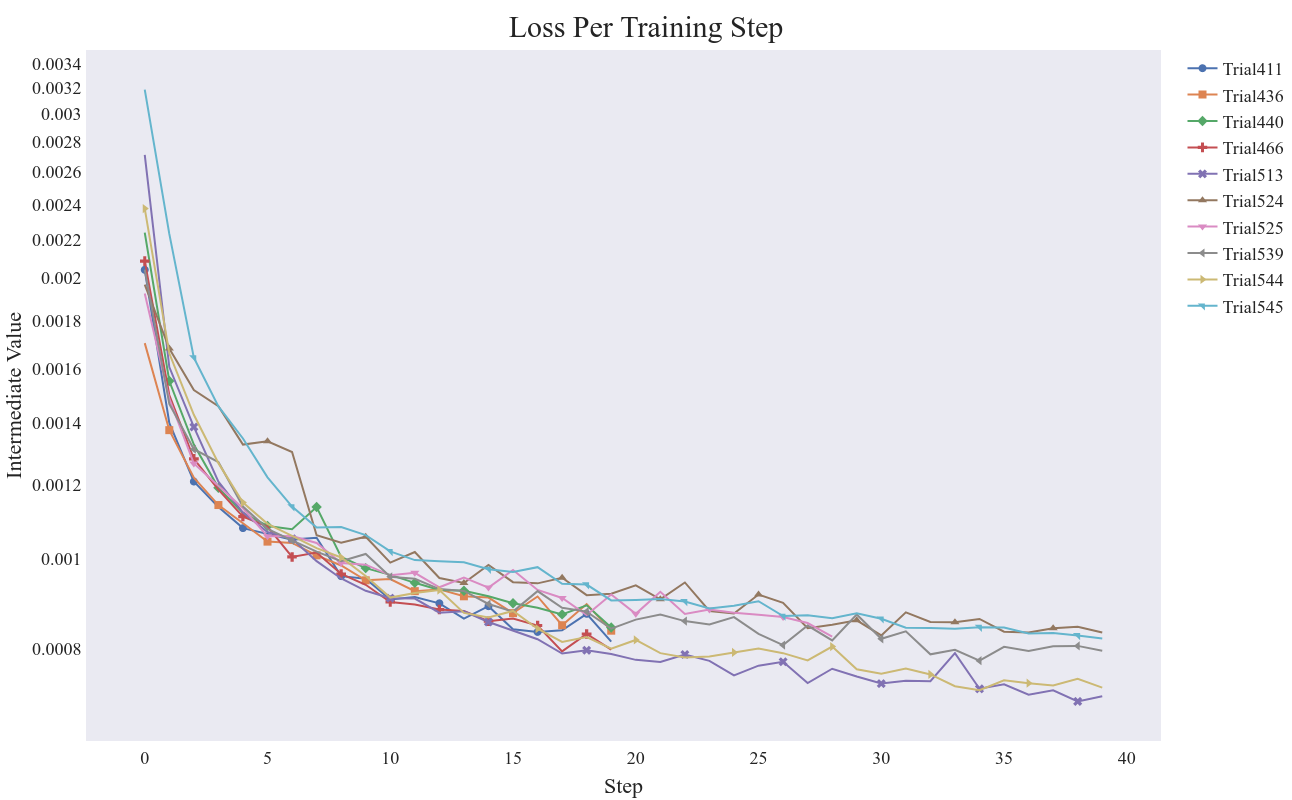

In [397]:
imp.reload(cplot)
scope = PlotlyScope()

fig=cplot.get_intermediate_plot(study,topx=10,num_trials_threshold=50)


fig.update_layout(
    autosize=False,title_text='Loss Per Training Step', title_x=0.5, title_y=0.98, yaxis_type="log",
    template="seaborn",
    width=500,
    height=800,
    font_family="Times New Roman",
    font_size=18,
    title_font_family="Times New Roman",
    title_font_size=30,
    margin=dict(l=0, t=50,r=1,  b=1),                                   
    )
fig.update_xaxes(showgrid=False,zeroline=False,)

fig.update_yaxes(showgrid=False,zeroline=False,)
with open("loss_per_training.svg", "wb") as f:
    f.write(scope.transform(fig, format="svg"))
fig

In [340]:
df=study.trials_dataframe().columns
df

Index(['number', 'value', 'datetime_start', 'datetime_complete', 'duration',
       'params_Dropout Rate', 'params_Frequency Bins', 'params_Hidden Layers',
       'params_L2 Regularization', 'params_Latent Size',
       'params_Learning Rate', 'params_Model Type', 'params_Optimizer',
       'params_Time Steps', 'system_attrs_completed_rung_0',
       'system_attrs_completed_rung_1', 'system_attrs_completed_rung_2',
       'system_attrs_completed_rung_3', 'system_attrs_fail_reason', 'state'],
      dtype='object')

In [ ]:
imp.reload(cplot)
importances=optuna.importance.get_param_importances(study,params=[p for p in params if p!=""])
fig=cplot.plot_param_importances(importances,study)
fig.update_layout(
    autosize=False,title_text='Hyper-Parameter Importances', title_x=0.5, title_y=0.98,
    template="seaborn",
    width=1250,
    height=400,
    font_family="Times New Roman",
    font_size=18,
    title_font_family="Times New Roman",
    title_font_size=30,
    margin=dict(l=0, t=50,r=1,  b=1),                                   
    )
with open("ParameterImportances.svg", "wb") as f:
    f.write(scope.transform(fig, format="svg", width=1200,height=400,))
fig

In [ ]:
imp.reload(cplot)
fig = cplot.get_optimization_history_plot(study)
fig.update_layout(
    autosize=False,title_text='Optimization History', title_x=0.5, title_y=0.98, yaxis_type="log",
    template="seaborn",
    width=900,
    height=400,
    font_family="Times New Roman",
    font_size=18,
    title_font_family="Times New Roman",
    title_font_size=28,
     margin=dict( r=10, l=10, b=0, t=50),
    
              legend=dict(
                  orientation="h",
                yanchor="top",
                y=1,
                xanchor="right",x=1)
    )


fig.update_xaxes(showgrid=False,zeroline=False,title_text="Trial #")

fig.update_yaxes(showgrid=False,title_text="Log Loss",dtick=1)
with open("Optimization_History.svg", "wb") as f:
    f.write(scope.transform(fig, format="svg", width=1100,height=500,  ))

fig

In [ ]:
print('Best trial until now:')
print(' Value: ', study.best_trial.value)
print(' Params: ')
for key, value in study.best_trial.params.items():
    print(f'    {key}: {value}')


In [ ]:

scope = PlotlyScope()

df=pd.read_csv("../feature_extraction/csvs/df_8_2D.csv",index_col=False)

# fig = px.scatter_3d(df, x="D1",y="D2",z="D3",color="label",symbol="drum_type",hover_data=["path"],color_discrete_sequence=px.colors.qualitative.Dark2)
s_map={"tom_mid":"x","hihat_closed":"circle","synth_noise":"cross","tom_low":"diamond","tom_high":"diamond"}
fig = px.scatter(df, x="D1",y="D2",color="drum_type",symbol="drum_type",hover_data=["path"],
                    color_discrete_sequence= px.colors.sequential.RdBu_r,symbol_map=s_map)

fig.update_layout(
 autosize=False,title_text='2 Dimensional Projection of Latent Variables', title_x=0.5, title_y=0.98,
                    template="seaborn",
                    width=1100,
                    height=500, margin=dict( r=10, l=10, b=0, t=50),
                    font_family="Times New Roman",
                    font_size=17,
                    title_font_family="Times New Roman",
                    title_font_size=28,
                    legend=dict(orientation="v",yanchor="top",y=1.0,xanchor="right",x=1))
fig.update_traces(marker=dict(size=10,opacity=1,line=dict(width=1,color='#666666')))
fig.update_xaxes(showgrid=False,zeroline=False,)

fig.update_yaxes(showgrid=False,zeroline=False,)

g=fig
fig.show()
with open("t-SNE_2d.svg", "wb") as f:
    f.write(scope.transform(fig, format="svg", width=1100,height=500,  ))


In [ ]:

scope = PlotlyScope()
df=pd.read_csv("../feature_extraction/csvs/df_8.csv",index_col=False)


# fig = px.scatter_3d(df, x="D1",y="D2",z="D3",color="label",symbol="drum_type",hover_data=["path"],color_discrete_sequence=px.colors.qualitative.Dark2)
fig = px.scatter_3d(df, x="D1",y="D2",z="D3",color="drum_type",symbol="drum_type",hover_data=["path"],symbol_map={"synth_noise":("cross")},
                    color_discrete_sequence= px.colors.qualitative.Alphabet_r)
fig.update_layout(scene = dict(
#                     camera=dict(eye=dict(x=-1, y=1, z=1.24)),
#                     camera=dict(eye=dict(x=1, y=0, z=1.2)),
                    camera=dict(eye=dict(x=1, y=1, z=-0.2)),
                    aspectmode="cube",),
                    template="ggplot2",
                    width=600,
                    height=550,  
                  margin=dict( r=5, l=10, b=0, t=0),
#                     showlegend=False,
              legend=dict(
                yanchor="top",
                y=0.99,
                xanchor="right",
                x=0.01
            ),)
fig.update_traces(marker=dict(size=10,opacity=1,line=dict(width=0.01,color='#666666')))
g=fig
fig.show()



In [ ]:

scope = PlotlyScope()
df=pd.read_csv("../feature_extraction/csvs/df_8.csv",index_col=False)
df["size"]=12
s_map={"tom_mid":"diamond","hihat_closed":"circle","synth_noise":"circle-open","tom_low":"diamond","tom_high":"circle","kick":"circle"}
def tsne3d(symboling,coloring,cam):
    cameras= [dict(eye=dict(x=1.3, y=1.3, z=1.3)),dict(eye=dict(x=-1, y=-1, z=0.5)),dict(eye=dict(x=-0.2, y=0.8, z=-0.6)),dict(eye=dict(x=0.5, y=0.4, z=-1.2))]
    camera_angle=cameras[cam]

    fig = px.scatter_3d(df, x="D1",y="D2",z="D3",color=coloring,symbol=symboling,hover_data=["path"],color_discrete_sequence= px.colors.sequential.RdBu_r,
                        symbol_map=s_map ,size_max=12,size="size" )
    fig.update_layout(scene = dict(
                        camera=camera_angle,aspectmode="auto",
                        xaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",                            
                        ),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    zaxis = dict(
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",),),
                        
                        template="seaborn",
                        width=500,height=400,  
                        margin=dict( r=5, l=10, b=0, t=0),
                        showlegend= cam == 0,
                          legend=dict(
                            yanchor="top",
                            y=0.99,
                            xanchor="right",
                            x=0.01
                        ),
                     )
    fig.update_traces(marker=dict(opacity=1,line=dict(width=1,color='#111111')))
    g=fig


    name="3d_t-SNE_sym%s_cam%d.pdf"%(symboling,cam)
    with open(name, "wb") as f:
        f.write(scope.transform(fig, format="pdf", width=600,height=400,  ))

for sym in ["drum_type","label"]:
    for cam in range(4):
        tsne3d(sym,"drum_type",cam)